In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader

import random

In [5]:
mean, std = 0.1307, 0.3081
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((mean,), (std,))
])

mnist_train = MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = MNIST(root='./data', train=False, download=True, transform=transform)

y_train = mnist_train.targets
nines_mask = y_train != 9 # remove all nines from train

X_train = mnist_train.data[nines_mask]
y_train = mnist_train.targets[nines_mask]

train_dataset = TensorDataset(X_train.unsqueeze(1), y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

X_test = mnist_test.data
y_test = mnist_test.targets

test_dataset = TensorDataset(X_test.unsqueeze(1), y_test)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)


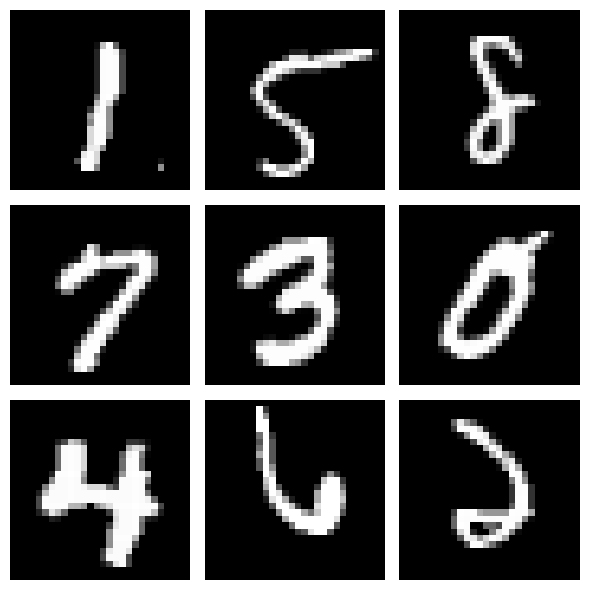

In [94]:

labels = list(set(y_train.numpy()))
random.shuffle(labels)

fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, lbl in enumerate(labels[:9]):
    idxs = (y_train == lbl).nonzero(as_tuple=True)[0]
    idx = random.choice(idxs)
    img = X_train[idx]
    row, col = divmod(i, 3)
    axes[row, col].imshow(img.squeeze(), cmap='gray')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

In [12]:
X_data = X_train.view(X_train.size(0), -1).numpy()


[44/44]
best number of clusters: 14


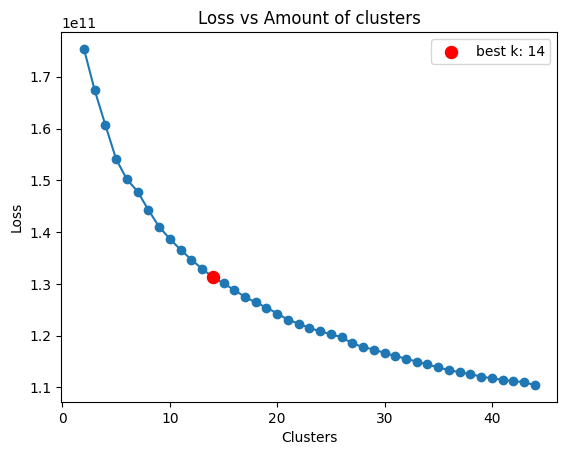

In [70]:
inertias = []
cluster_range = range(2, 45)
for k in cluster_range:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X_data)
    inertias.append(km.inertia_)
    print(f"\r[{k}/{max(cluster_range)}]", end="")





x = np.array(list(cluster_range))
y = np.array(inertias)

# line between first and last point
line = np.array([ (x[0], y[0]), (x[-1], y[-1]) ])
vec = line[1] - line[0]
vec = vec / np.linalg.norm(vec)

# distances from line
# elbow is where this distance is the biggest (not very obvious on the graph, need to compute it)
distances = np.abs((vec[1] * (x - line[0][0]) - vec[0] * (y - line[0][1])) / np.linalg.norm(vec))
elbow_idx = np.argmax(distances)
best_k = x[elbow_idx]

print(f"\nbest number of clusters: {best_k}")

plt.plot(cluster_range, inertias, marker='o')
plt.scatter([best_k], [inertias[elbow_idx]],color='red', s=75, label=f"best k: {best_k}", zorder = 1337)
plt.xlabel("Clusters")
plt.ylabel("Loss")
plt.title("Loss vs Amount of clusters")
plt.legend()
plt.savefig("imgs/elbow.png", dpi=300)
plt.show()

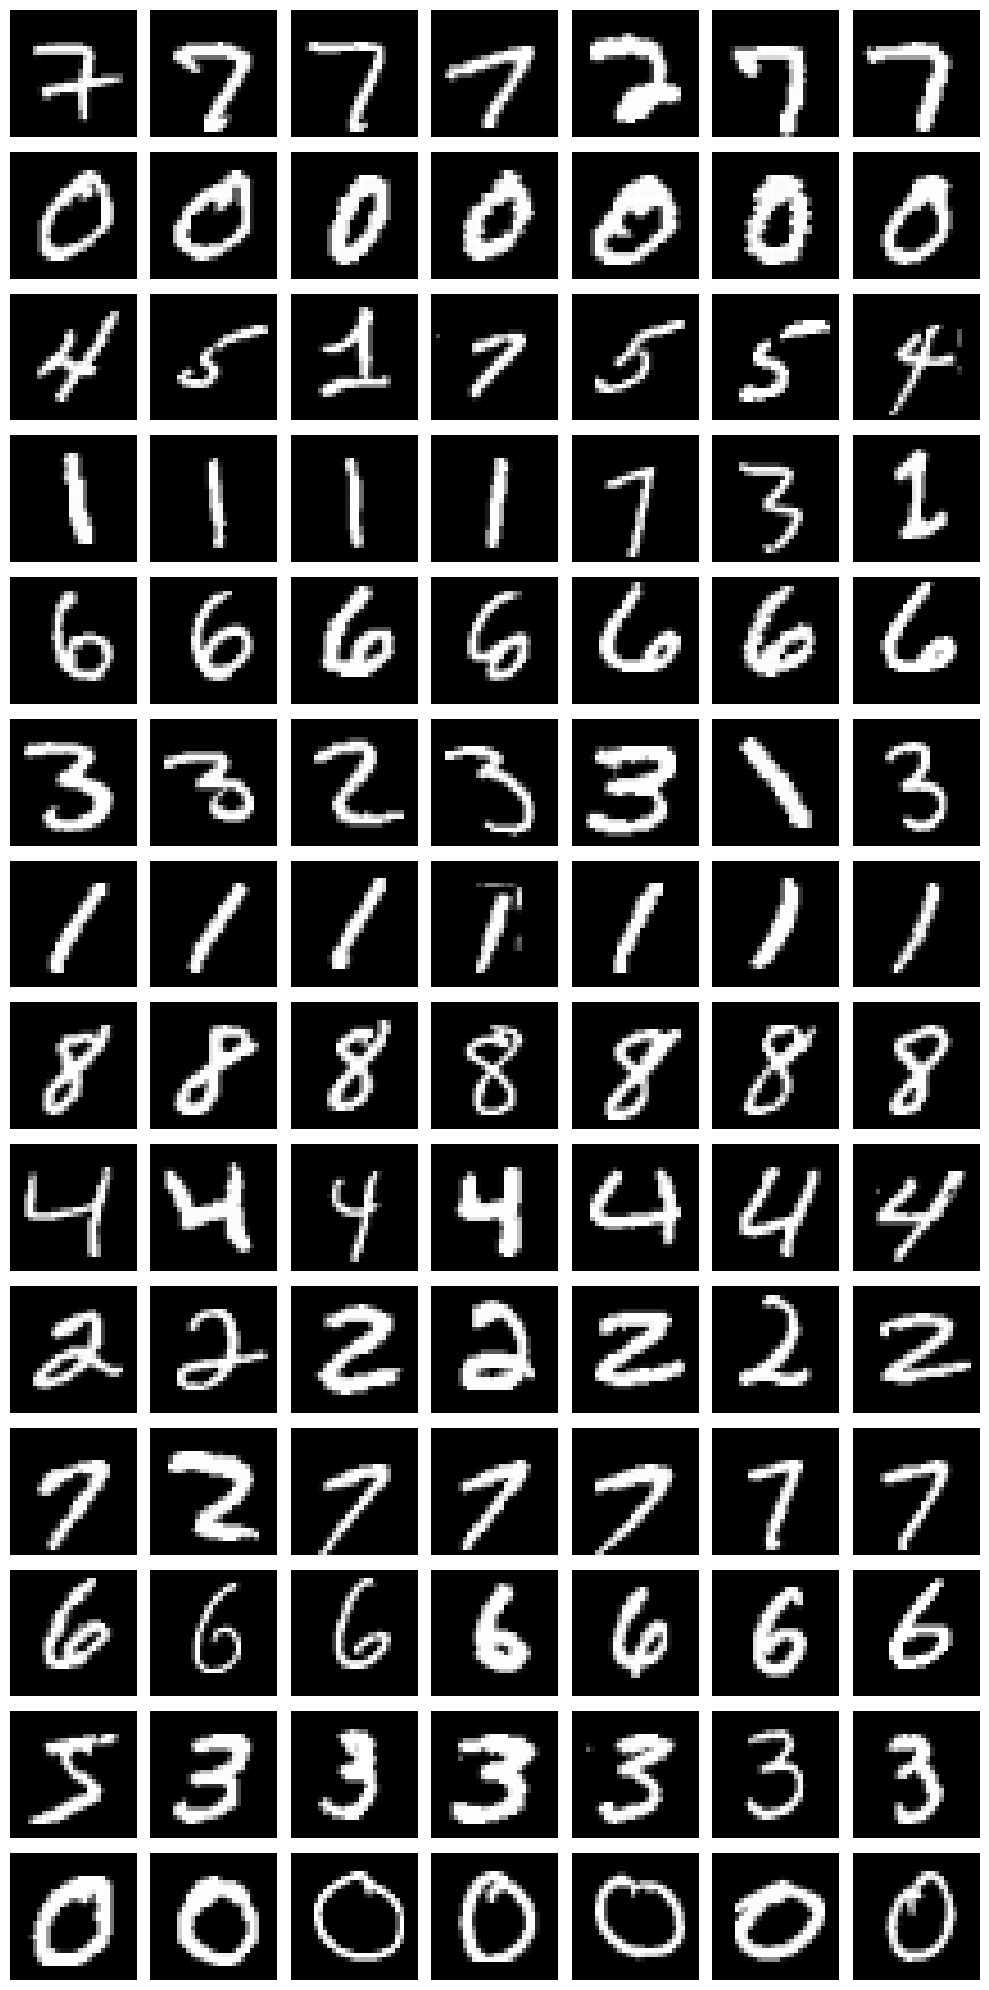

In [102]:
X_flat = X_train.view(X_train.size(0), -1).numpy()
kmeans = KMeans(n_clusters=14, random_state=0)
labels = kmeans.fit_predict(X_flat)

examples_per_cluster = 7
fig, axes = plt.subplots(14, examples_per_cluster, figsize=(10, 20))

for cluster_id in range(14):
    idxs = np.where(labels == cluster_id)[0][:examples_per_cluster]
    for j, idx in enumerate(idxs):
        axes[cluster_id, j].imshow(X_train[idx].squeeze(), cmap='gray')
        axes[cluster_id, j].axis('off')

plt.tight_layout()
plt.show()